# Dump and reload example for cancer simulation 
This notebook illustrates how to dump a cancer simulation to disk, reload it, and continue with changed parameters. We start a simulation with one set of parameters. Then, we dump the simulation to disk, reload it and continue it for a number of generations with some parameters changed.

## Import modules 

In [1]:
# The cancer simulation module.
from casim import casim
import logging

In [2]:
#  3rd party modules.
import os, shutil
from wand.image import Image as WImage
from glob import glob

## Setup parameters 

In [3]:
parameters=casim.CancerSimulatorParameters(
                                matrix_size=200,
                                number_of_generations=10,
                                division_probability=1.0,
                                adv_mutant_division_probability=0.1,
                                death_probability=0.1,
                                adv_mutant_death_probability=0.0,
                                mutation_probability=0.2,
                                adv_mutant_mutation_probability=0.8,
                                number_of_mutations_per_division=10,
                                adv_mutation_wait_time=3,
                                number_of_initial_mutations=2,
                                sampling_fraction=0.1,
                                plot_tumour_growth=True,
                                export_tumour=True
                               )

## Setup the simulation engine. 

In [4]:
if os.path.isdir('out'):
    shutil.rmtree('out')

In [5]:
cancer_sim = casim.CancerSimulator(parameters, seed=1, outdir='out/')

2020-08-13 17:33:50,379 INFO: Running in single tumour mode.
2020-08-13 17:33:50,381 INFO: First cell at (100, 100).


In [6]:
logging.getLogger().setLevel(logging.WARNING)

## Run the simulation 

In [7]:
cancer_sim.run()

0

In [8]:
image_path=os.path.join(cancer_sim.outdir,'cancer_1', 'simOutput')

In [9]:
pdfs = glob(os.path.join(image_path,"*.pdf"))

out/cancer_1/simOutput/growthCurve.pdf


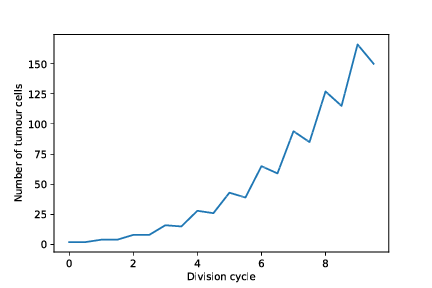

out/cancer_1/simOutput/sampleHistogram_106_102.pdf


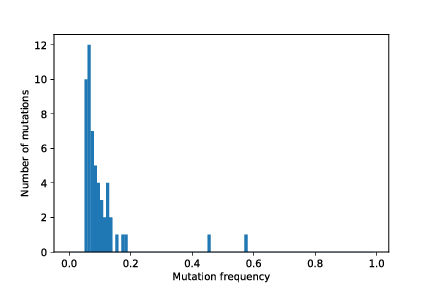

out/cancer_1/simOutput/wholeTumourVAFHistogram.pdf


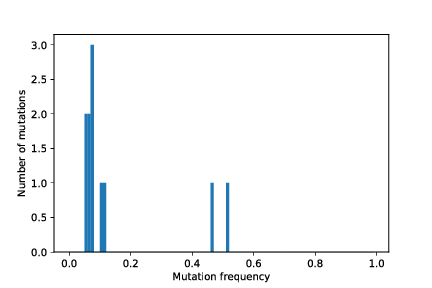

In [10]:
for pdf in pdfs:
    print(pdf)
    display(WImage(filename=pdf))

In [11]:
import pickle
from matplotlib import pyplot

In [12]:
def unpickle(file):

    with open(os.path.join(cancer_sim._CancerSimulator__simdir, file),'rb') as fp:
        return pickle.load(fp)

In [13]:
# Load the mutation matrix
mtx=unpickle('mtx.p').toarray()

<Figure size 432x288 with 0 Axes>

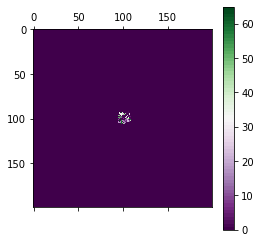

In [14]:
# Plot the tumour as a 2D map color coding the mutation ID
pyplot.figure(3)
cmap = pyplot.cm.get_cmap('PRGn', mtx.max()+1)

pyplot.matshow(mtx, cmap=cmap)
pyplot.colorbar()

## Dump the simulation

In [15]:
cancer_sim.dump()

In [16]:
cancer_sim = casim.load_cancer_simulation('out/cancer_1/cancer_sim.py.dill')

In [17]:
cancer_sim.parameters.adv_mutant_death_probability = 0.3
cancer_sim.parameters.adv_mutant_division_probability = 0.9
cancer_sim.parameters.number_of_generations = 20

In [18]:
cancer_sim.run()

0

## Output
After the run has finished, you should find the results in
`out/cancer_1/simOutput`.

In [19]:
pdfs = glob(os.path.join(image_path,"*.pdf"))

In [20]:
pdfs

['out/cancer_1/simOutput/growthCurve.pdf',
 'out/cancer_1/simOutput/sampleHistogram_106_102.pdf',
 'out/cancer_1/simOutput/wholeTumourVAFHistogram.pdf',
 'out/cancer_1/simOutput/sampleHistogram_113_102.pdf']

out/cancer_1/simOutput/growthCurve.pdf


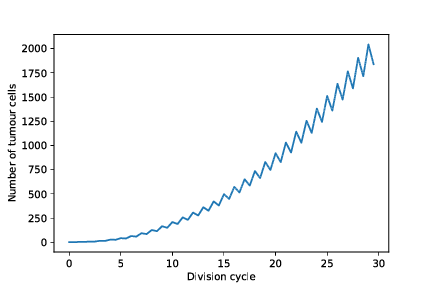

out/cancer_1/simOutput/sampleHistogram_106_102.pdf


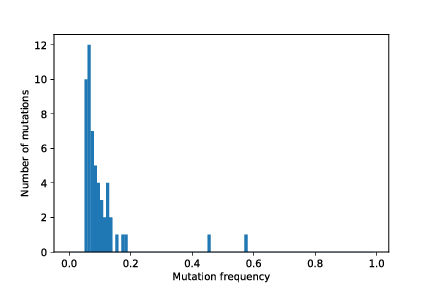

out/cancer_1/simOutput/wholeTumourVAFHistogram.pdf


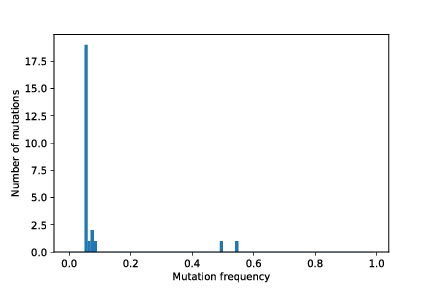

out/cancer_1/simOutput/sampleHistogram_113_102.pdf


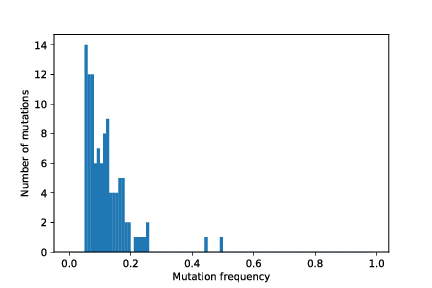

In [21]:
for pdf in pdfs:
    print(pdf)
    display(WImage(filename=pdf))

In [22]:
# Load the mutation matrix
mtx=unpickle('mtx.p').toarray()

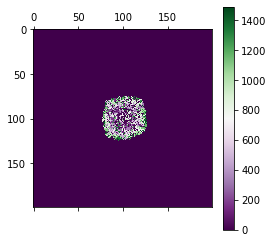

In [23]:
# Plot the tumour as a 2D map color coding the mutation ID
cmap = pyplot.cm.get_cmap('PRGn', mtx.max()+1)

pyplot.matshow(mtx, cmap=cmap)
pyplot.colorbar()